In [2]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Loading the data
df = pd.read_csv('student_feedback.csv')
df.head()

,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [ ]:
df.shape

(1001, 10)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   StudentID              1001 non-null   int64
 1   SubjectKnowledge       1001 non-null   int64
 2   ClarityOfExplanation   1001 non-null   int64
 3   UseOfPresentations     1001 non-null   int64
 4   AssignmentDifficulty   1001 non-null   int64
 5   DoubtSolving           1001 non-null   int64
 6   CourseStructure        1001 non-null   int64
 7   SupportForExtraEffort  1001 non-null   int64
 8   CourseRecommendation   1001 non-null   int64
 9   OverallSatisfaction    1001 non-null   int64
dtypes: int64(10)
memory usage: 78.3 KB


In [6]:
# Null Check
df.isnull().sum()

Unnamed: 0                                              0
Student ID                                              0
Well versed with the subject                            0
Explains concepts in an understandable way              0
Use of presentations                                    0
Degree of difficulty of assignments                     0
Solves doubts willingly                                 0
Structuring of the course                               0
Provides support for students going above and beyond    0
Course recommendation based on relevance                0
dtype: int64

In [7]:
# Duplicates Check
df.duplicated().sum()

np.int64(0)

In [8]:

# Droping the unnamed first column (likely index from export)
df = df.drop(columns=df.columns[0], errors='ignore')

# Renaming columns
df.columns = [
    'StudentID',
    'SubjectKnowledge',
    'ClarityOfExplanation',
    'UseOfPresentations',
    'AssignmentDifficulty',
    'DoubtSolving',
    'CourseStructure',
    'SupportForExtraEffort',
    'CourseRecommendation'
]

C:\Users\infin\AppData\Local\Temp\ipykernel_2544\2543683740.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ratings.values, y=avg_ratings.index, palette="viridis")


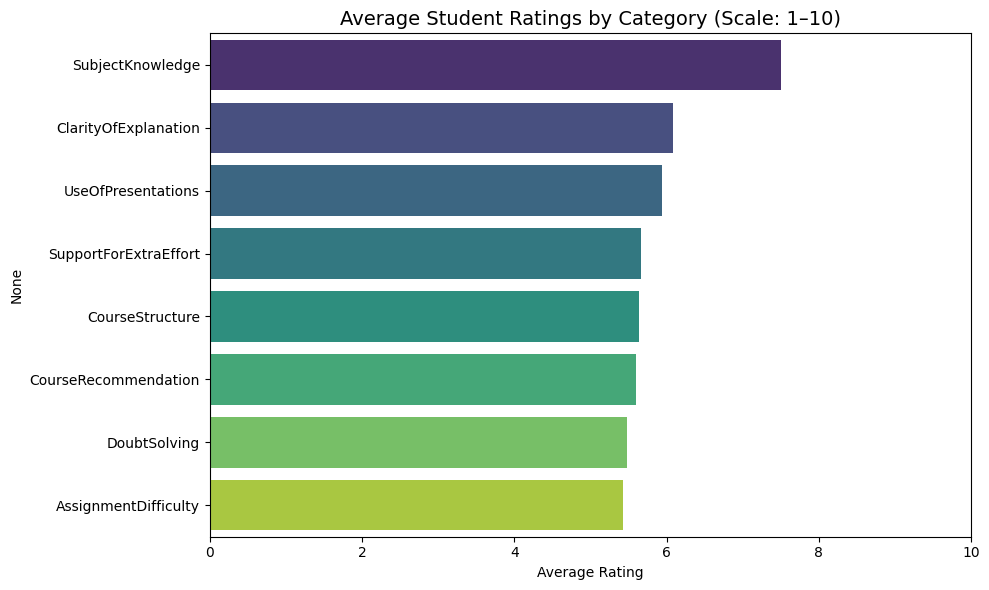


Top 3 Best-Rated Aspects:
SubjectKnowledge        7.497502
ClarityOfExplanation    6.081918
UseOfPresentations      5.942058
dtype: float64

Bottom 3 Worst-Rated Aspects:
CourseRecommendation    5.598402
DoubtSolving            5.474525
AssignmentDifficulty    5.430569
dtype: float64


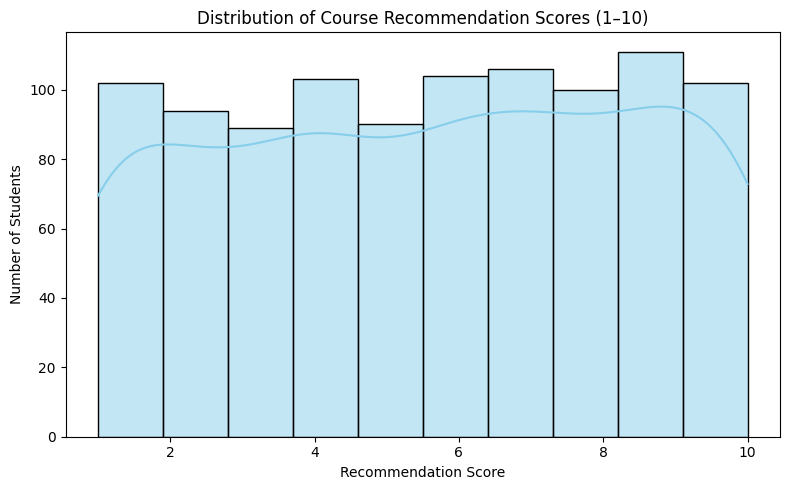


Correlation with Course Recommendation (highest to lowest):
CourseRecommendation     1.000000
UseOfPresentations       0.023173
ClarityOfExplanation     0.008528
DoubtSolving            -0.000511
AssignmentDifficulty    -0.005181
CourseStructure         -0.010224
SubjectKnowledge        -0.015143
SupportForExtraEffort   -0.031117
Name: CourseRecommendation, dtype: float64


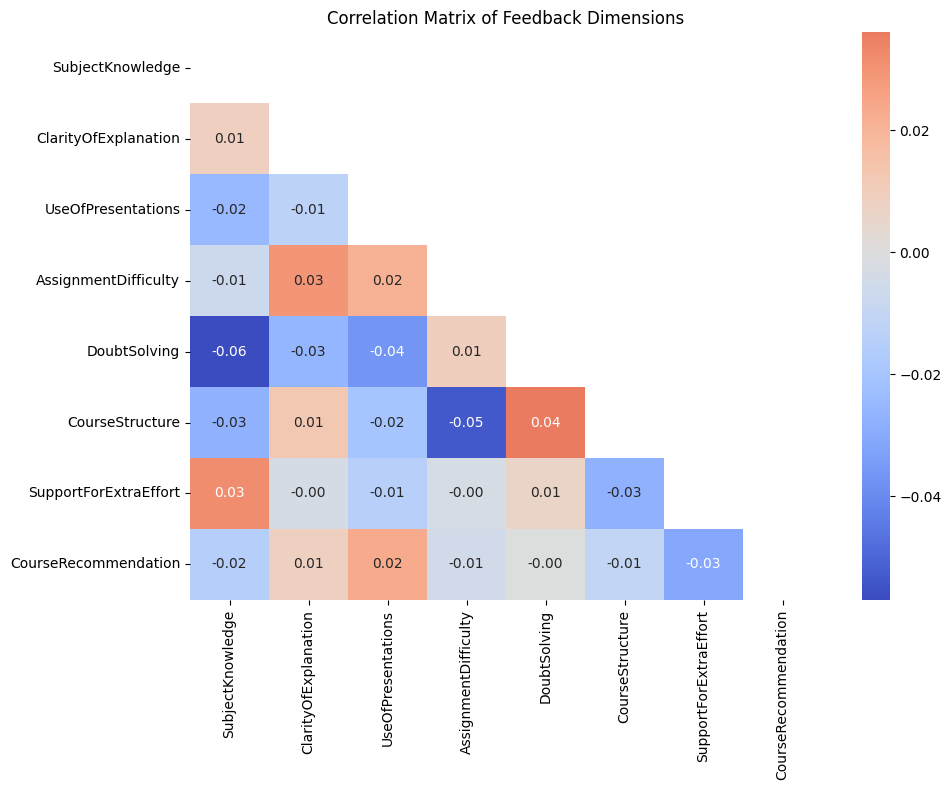

In [9]:
# ---
# 📊 ANALYSIS: Average ratings per category
# ---
rating_columns = df.columns.drop('StudentID')
avg_ratings = df[rating_columns].mean().sort_values(ascending=False)

# Plot average ratings
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_ratings.values, y=avg_ratings.index, palette="viridis")
plt.title('Average Student Ratings by Category (Scale: 1–10)', fontsize=14)
plt.xlabel('Average Rating')
plt.xlim(0, 10)
plt.tight_layout()
plt.savefig('avg_ratings.png')
plt.show()

# ---
# 🔍 INSIGHT: Top 3 and Bottom 3 rated aspects
# ---
print("\nTop 3 Best-Rated Aspects:")
print(avg_ratings.head(3))
print("\nBottom 3 Worst-Rated Aspects:")
print(avg_ratings.tail(3))

# ---
# 📈 Overall Satisfaction Proxy
# ---
# Use 'CourseRecommendation' as proxy for overall satisfaction
df['OverallSatisfaction'] = df['CourseRecommendation']

# Distribution of overall satisfaction
plt.figure(figsize=(8, 5))
sns.histplot(df['OverallSatisfaction'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Course Recommendation Scores (1–10)')
plt.xlabel('Recommendation Score')
plt.ylabel('Number of Students')
plt.tight_layout()
plt.savefig('recommendation_dist.png')
plt.show()

# ---
# 🔗 Correlation Analysis
# ---
# Compute correlation matrix
corr = df[rating_columns].corr()

# Focus: How each factor correlates with CourseRecommendation
rec_corr = corr['CourseRecommendation'].sort_values(ascending=False)
print("\nCorrelation with Course Recommendation (highest to lowest):")
print(rec_corr)

# Heatmap of top correlations
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlation Matrix of Feedback Dimensions')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()



In [10]:
print("\n" + "="*60)
print("📋 KEY RECOMMENDATIONS FOR EVENT/INSTRUCTOR IMPROVEMENT")
print("="*60)

# 1. Focus Areas
weak_areas = avg_ratings.tail(3).index.tolist()
print(f"\n1. ⚠️  Improve: {', '.join(weak_areas)}")
print("   These areas had the lowest ratings.")

# 2. Key Drivers of Recommendation
top_predictors = rec_corr[1:4].index.tolist()
print(f"\n2. ✅ Key strengths: {', '.join(top_predictors)}")
print("   These factors most influence recommendations.")

# 3. Assignment & Support
avg_difficulty = df['AssignmentDifficulty'].mean()
avg_support = df['SupportForExtraEffort'].mean()
print(f"\n3. 📚 Assignments:")
print(f"   - Difficulty: {avg_difficulty:.2f}")
print(f"   - Support: {avg_support:.2f}")
if avg_difficulty > 6 and avg_support < 5:
    print("   → High difficulty, low support. Offer more help/resources.")
else:
    print("   → Difficulty and support levels seem balanced.")

# 4. Course Clarity & Structure
clarity = df['ClarityOfExplanation'].mean()
structure = df['CourseStructure'].mean()
if clarity < 6 or structure < 6:
    print(f"\n4. 🧩 Improve design:")
    print(f"   Clarity: {clarity:.2f}, Structure: {structure:.2f}")
    print("   Consider clearer explanations and better organization.")

print("\n✅ End of Report")



📋 KEY RECOMMENDATIONS FOR EVENT/INSTRUCTOR IMPROVEMENT

1. ⚠️  Improve: CourseRecommendation, DoubtSolving, AssignmentDifficulty
   These areas had the lowest ratings.

2. ✅ Key strengths: UseOfPresentations, ClarityOfExplanation, DoubtSolving
   These factors most influence recommendations.

3. 📚 Assignments:
   - Difficulty: 5.43
   - Support: 5.66
   → Difficulty and support levels seem balanced.

4. 🧩 Improve design:
   Clarity: 6.08, Structure: 5.64
   Consider clearer explanations and better organization.

✅ End of Report
